# Implementing the AdaBoost Algorithm From Scratch

ref: https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html

## Prepare Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [3]:
iris=pd.read_csv("./iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# consider only two class
dataset = iris[(iris['variety'] == 'Versicolor') | (iris['variety'] == 'Virginica')]
dataset.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor


In [5]:
# replace the two classes with +1 and -1
dataset['Label'] = dataset['variety'].replace(to_replace=['Versicolor', 'Virginica'], value=[1, -1])
dataset.head(2)

/var/folders/9c/wttdnjf91kd0xyx_s_nh07_00000gn/T/ipykernel_95432/2335877930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Label'] = dataset['variety'].replace(to_replace=['Versicolor', 'Virginica'], value=[1, -1])


,sepal.length,sepal.width,petal.length,petal.width,variety,Label
50,7.0,3.2,4.7,1.4,Versicolor,1
51,6.4,3.2,4.5,1.5,Versicolor,1


In [6]:
dataset = dataset.drop('variety', axis=1)

## Boosting Round 1

In [7]:
# initially assign same weights to each records in the dataset
dataset['probR1'] = 1/(dataset.shape[0])
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [8]:
# 随机有放回抽样获取样本
random.seed(10)
dataset1 = dataset.sample(len(dataset), replace=True, weights=dataset['probR1'])
dataset1

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1
61,5.9,3.0,4.2,1.5,1,0.01
135,7.7,3.0,6.1,2.3,-1,0.01
77,6.7,3.0,5.0,1.7,1,0.01
67,5.8,2.7,4.1,1.0,1,0.01
82,5.8,2.7,3.9,1.2,1,0.01
136,6.3,3.4,5.6,2.4,-1,0.01
97,6.2,2.9,4.3,1.3,1,0.01
107,7.3,2.9,6.3,1.8,-1,0.01
108,6.7,2.5,5.8,1.8,-1,0.01
53,5.5,2.3,4.0,1.3,1,0.01


In [9]:
X_train = dataset1.iloc[0:len(iris), 0:4]
y_train = dataset1.iloc[0:len(iris), 4]

In [10]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(167.4, 163.07999999999998, 'X[2] <= 4.8\ngini = 0.498\nsamples = 100\nvalue = [47, 53]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 52\nvalue = [0, 52]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.041\nsamples = 48\nvalue = [47, 1]')]

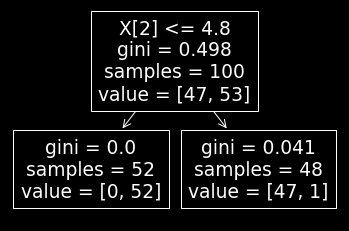

In [11]:
# plot tree for round 1 boosting
tree.plot_tree(clf)

In [12]:
# predict
y_pred = clf_gini.predict(dataset.iloc[0:len(iris), 0:4])
y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [13]:
# adding a column pred1 after the first round of boosting
dataset['pred1'] = y_pred
dataset

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,-1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1
55,5.7,2.8,4.5,1.3,1,0.01,1
56,6.3,3.3,4.7,1.6,1,0.01,1
57,4.9,2.4,3.3,1.0,1,0.01,1
58,6.6,2.9,4.6,1.3,1,0.01,1
59,5.2,2.7,3.9,1.4,1,0.01,1


In [14]:
# misclassified = 0 if the label and prediction are same
dataset.loc[dataset.Label != dataset.pred1, 'misclassified'] = 1
dataset.loc[dataset.Label == dataset.pred1, 'misclassified'] = 0
dataset

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0


In [15]:
# calculate error
e1 = sum(dataset['misclassified'] * dataset['probR1'])
e1

0.07

In [16]:
# calculate the alpha
alpha1 = 0.5 * log((1-e1)/e1)
alpha1

1.2933446720489712

In [17]:
# update the weight
new_weight = dataset['probR1'] * np.exp(-1*alpha1*dataset['Label']*dataset['pred1'])
new_weight

50     0.002744
51     0.002744
52     0.036450
53     0.002744
54     0.002744
55     0.002744
56     0.002744
57     0.002744
58     0.002744
59     0.002744
60     0.002744
61     0.002744
62     0.002744
63     0.002744
64     0.002744
65     0.002744
66     0.002744
67     0.002744
68     0.002744
69     0.002744
70     0.036450
71     0.002744
72     0.036450
73     0.002744
74     0.002744
75     0.002744
76     0.036450
77     0.036450
78     0.002744
79     0.002744
80     0.002744
81     0.002744
82     0.002744
83     0.036450
84     0.002744
85     0.002744
86     0.002744
87     0.002744
88     0.002744
89     0.002744
90     0.002744
91     0.002744
92     0.002744
93     0.002744
94     0.002744
95     0.002744
96     0.002744
97     0.002744
98     0.002744
99     0.002744
100    0.002744
101    0.002744
102    0.002744
103    0.002744
104    0.002744
105    0.002744
106    0.036450
107    0.002744
108    0.002744
109    0.002744
110    0.002744
111    0.002744
112    0

In [18]:
# normalize weight
z = sum(new_weight)
normalized_weight = new_weight / z
dataset['probR2'] = round(normalized_weight, 4)
dataset

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,probR2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054


## Boosting Round 2

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,probR2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1


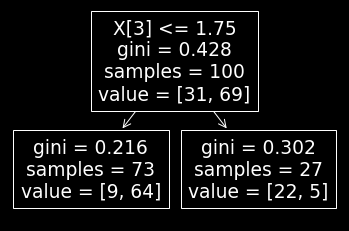

In [19]:
# round 2
random.seed(20)
dataset2 = dataset.sample(len(dataset), replace=True, weights=dataset['probR2'])
dataset2 = dataset2.iloc[:, 0:5]
X_train = dataset2.iloc[0:len(iris), 0:4]
y_train = dataset2.iloc[0:len(iris), 4]

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

y_pred = clf_gini.predict(dataset.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
dataset['pred2'] = y_pred
dataset

In [20]:
# adding a field misclassified2
dataset.loc[dataset.Label != dataset.pred2, 'misclassified2'] = 1
dataset.loc[dataset.Label == dataset.pred2, 'misclassified2'] = 0

# calculation of error
e2 = sum(dataset['misclassified2'] * dataset['probR2'])
print("e2:", e2)

#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
print("alpha2:", alpha2)

#update weight
new_weight = dataset['probR2']*np.exp(-1*alpha2*dataset['Label']*dataset['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/z
dataset['probR3'] = round(normalized_weight,4)

dataset

e2: 0.16439999999999996
alpha2: 0.8129237735301656


,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,probR2,pred2,misclassified2,probR3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0427
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0032
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0032
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032


## Boosting Round 3

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,probR2,pred2,misclassified2,probR3,pred3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0427,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0032,-1
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1


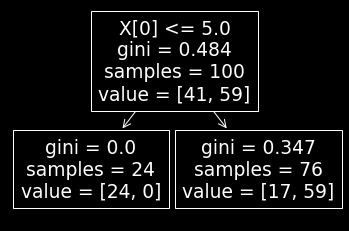

In [21]:
# round 3
random.seed(30)
dataset3 = dataset.sample(len(dataset), replace=True, weights=dataset['probR3'])
dataset3 = dataset3.iloc[:, 0:5]
X_train = dataset3.iloc[0:len(iris), 0:4]
y_train = dataset3.iloc[0:len(iris), 4]

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

y_pred = clf_gini.predict(dataset.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
dataset['pred3'] = y_pred
dataset

In [22]:
# adding a field misclassified3
dataset.loc[dataset.Label != dataset.pred3, 'misclassified3'] = 1
dataset.loc[dataset.Label == dataset.pred3, 'misclassified3'] = 0

# calculation of error
e3 = sum(dataset['misclassified3'] * dataset['probR3'])
print("e3:", e3)

#calculation of alpha
alpha3 = 0.5*log((1-e3)/e3)
print("alpha3:", alpha3)

#update weight
new_weight = dataset['probR3']*np.exp(-1*alpha3*dataset['Label']*dataset['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/z
dataset['probR4'] = round(normalized_weight,4)

dataset

e3: 0.21920000000000012
alpha3: 0.6351672400125108


,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,probR2,pred2,misclassified2,probR3,pred3,misclassified3,probR4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0427,1,0.0,0.0274
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0032,-1,1.0,0.0073
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021


## Boosting Round 4

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,probR2,pred2,misclassified2,probR3,pred3,misclassified3,probR4,pred4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0427,1,0.0,0.0274,-1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0032,-1,1.0,0.0073,-1
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1


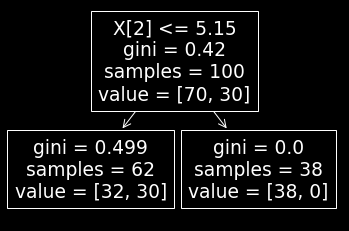

In [23]:
# round 4
random.seed(40)
dataset4 = dataset.sample(len(dataset), replace=True, weights=dataset['probR4'])
dataset4 = dataset4.iloc[:, 0:5]
X_train = dataset4.iloc[0:len(iris), 0:4]
y_train = dataset4.iloc[0:len(iris), 4]

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

y_pred = clf_gini.predict(dataset.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
dataset['pred4'] = y_pred
dataset

In [24]:
# adding a field misclassified3
dataset.loc[dataset.Label != dataset.pred4, 'misclassified4'] = 1
dataset.loc[dataset.Label == dataset.pred4, 'misclassified4'] = 0

# calculation of error
e4 = sum(dataset['misclassified4'] * dataset['probR4'])
print("e1:", e1)
print("e2:", e2)
print("e3:", e3)
print("e4:", e4)

#calculation of alpha
alpha4 = 0.5*log((1-e4)/e4)
print("alpha1:", alpha1)
print("alpha2:", alpha2)
print("alpha3:", alpha3)
print("alpha4:", alpha4)

e1: 0.07
e2: 0.16439999999999996
e3: 0.21920000000000012
e4: 0.3840999999999997
alpha1: 1.2933446720489712
alpha2: 0.8129237735301656
alpha3: 0.6351672400125108
alpha4: 0.23609083867056985


## Final model

In [25]:
# final prediction
t = alpha1 * dataset['pred1'] + alpha2 * dataset['pred2'] + alpha3 * dataset['pred3'] + alpha4 * dataset['pred4']

# sign the final prediction
dataset['final_pred'] = np.sign(list(t))
dataset

,sepal.length,sepal.width,petal.length,petal.width,Label,probR1,pred1,misclassified,probR2,pred2,misclassified2,probR3,pred3,misclassified3,probR4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1,1.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1,1.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0427,1,0.0,0.0274,-1,1.0,-1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1,1.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1,1.0,1.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1,1.0,1.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1,1.0,1.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0032,-1,1.0,0.0073,-1,1.0,1.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1,1.0,1.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0021,-1,1.0,1.0


In [26]:
# Confusion matrix
c = confusion_matrix(dataset['Label'], dataset['final_pred'])
print("confusion_matrix:", c)

# Overall Accuracy
acc = (c[0,0]+c[1,1])/np.sum(c)*100
print("acc:", acc)

confusion_matrix: [[49  1]
 [ 6 44]]
acc: 93.0


## AdaBoostClassifier

In [27]:
# Fitting the model using the adaboost classifier library
from sklearn.ensemble import AdaBoostClassifier

In [29]:
iris=pd.read_csv("./iris.csv")
dataset = iris[(iris['variety'] == 'Versicolor') | (iris['variety'] == 'Virginica')]
#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)
clf.predict([[5.5, 2.5, 4.0, 1.3]])
clf.score(X_train, y_train)

0.9733333333333334